In [73]:
import matplotlib.pyplot as plt
import numpy as np

num_particles = 500
T = 2.0

In [12]:
def lj_func(lambd, r, sigma = 1, eps = 1):
    if r == 0:
        r = 1E-10

    temp = lambd**5 * (sigma / r)**12 - lambd**3 * (sigma / r)**6
    return 4 * eps * temp

def lj_potential(lambd, r_range, sigma = 1, eps = 1):
    res = []
    for r in r_range:
        res.append(lj_func(lambd, r, sigma, eps))
    return res

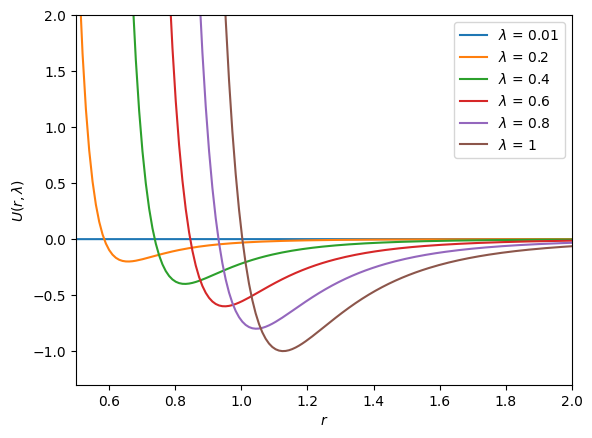

In [39]:
rstart, rend = 0.5, 2
r_range = np.arange(rstart, rend, 0.01)
x = np.linspace(rstart, rend, len(r_range))
for k in [.01, .2, .4, .6, .8, 1]:
    potential = lj_potential(lambd=k, r_range=r_range)
    plt.plot(x, potential, label=f'$\lambda$ = {k}')

plt.xlim(rstart, rend)
plt.ylim(-1.3, 2)
plt.xlabel(r'$r$')
plt.ylabel(r'$U(r, \lambda)$')
plt.legend()

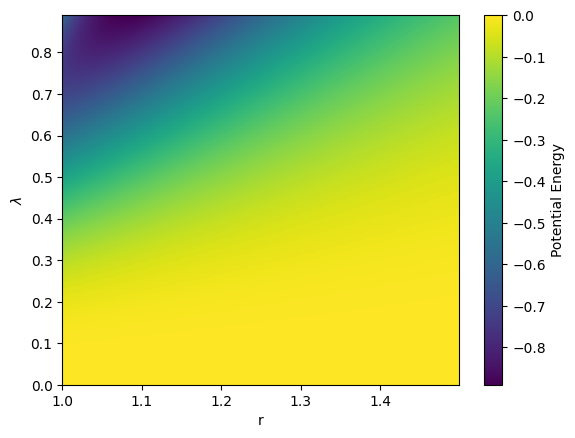

In [122]:
r_range = np.arange(1, 1.5, 0.001)
lambd_range = np.arange(0, 0.9, 0.01)

arr = []
for k in lambd_range:
    potential = lj_potential(lambd=k, r_range=r_range)
    arr.append(potential)

arr = np.array(arr)

plt.imshow(arr, extent=[min(r_range), max(r_range), min(lambd_range), max(lambd_range)],
            aspect='auto', origin='lower', cmap='viridis')
plt.xlabel('r')
plt.ylabel(r'$\lambda$')
plt.colorbar(label='Potential Energy')
plt.show()

Text(0, 0.5, '$dU / d\\lambda $')

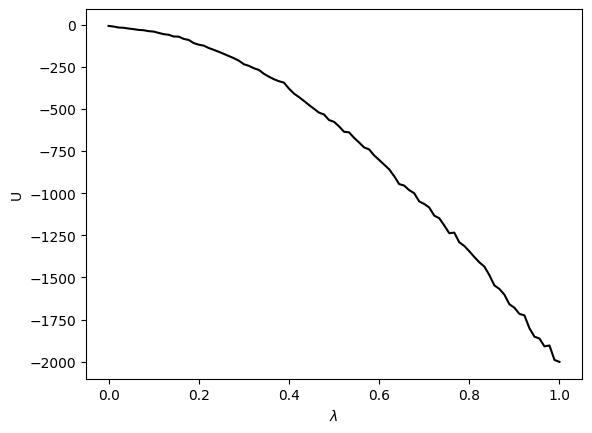

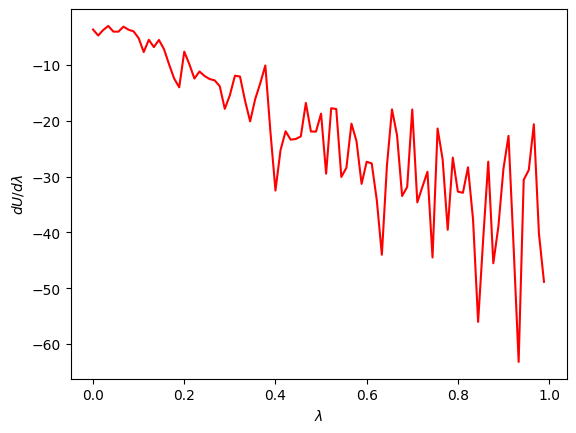

In [53]:
with open("total_energies") as file:
    lines = file.readlines()
    total_energies = [float(line) for line in lines]

D_energy = np.gradient(total_energies)[:-1]


x = np.linspace(0, 1, len(total_energies))
plt.plot(x, total_energies, 'k')
plt.xlabel(r'$\lambda$')
plt.ylabel('U')

plt.figure()
plt.plot(x[:-1], D_energy, 'r')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$dU / d\lambda $')


Text(0, 0.5, '$\\partial U/ \\partial \\lambda$')

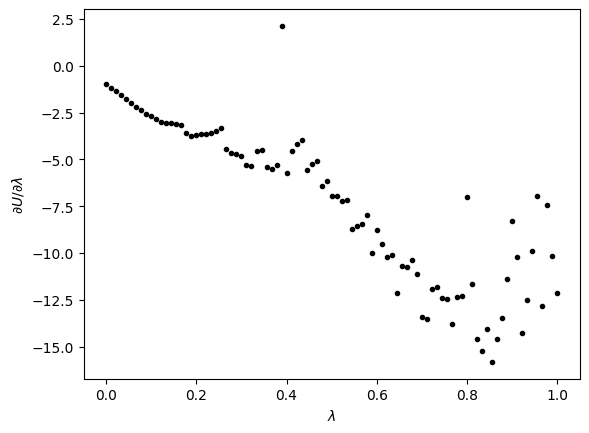

In [58]:
with open("total_der_energies") as file:
    lines = file.readlines()
    der_total_energies = [float(line) for line in lines]

x = np.linspace(0, 1, len(der_total_energies))
plt.plot(x, der_total_energies, 'k.')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$\partial U/ \partial \lambda$')


In [68]:
mean_der_energies = [elem / num_particles for elem in der_total_energies]

integral_value = np.trapz(mean_der_energies)

print(integral_value)


-1.3212444300000001
